In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Load datasets
hospitals = ['1', '2', 'NLH', 'MHA']
dfs = {hosp: pd.read_csv(f'{hosp}.csv') for hosp in hospitals}

In [42]:
# Check for null/na values in the 'Aggressor' field
for hosp, df in dfs.items():
    df.replace('<N/S>', pd.NA, inplace=True)  # Treat <N/S> as missing
    column_has_nulls = df['Aggressor'].isna().any()
    print(f"{hosp} - 'Aggressor' NULL Val:", column_has_nulls)

1 - 'Aggressor' NULL Val: False
2 - 'Aggressor' NULL Val: False
NLH - 'Aggressor' NULL Val: True
MHA - 'Aggressor' NULL Val: True


In [43]:
all_dates = pd.concat([df[['Aggressor']].dropna() for df in dfs.values()])

In [44]:
all_dates['Aggressor'].unique()

array(['Patient', 'Employee (Lateral)', 'Visitor', 'Other', 'Inpatient',
       'Resident (LTC)', 'Outpatient'], dtype=object)

Note: potential overlapping

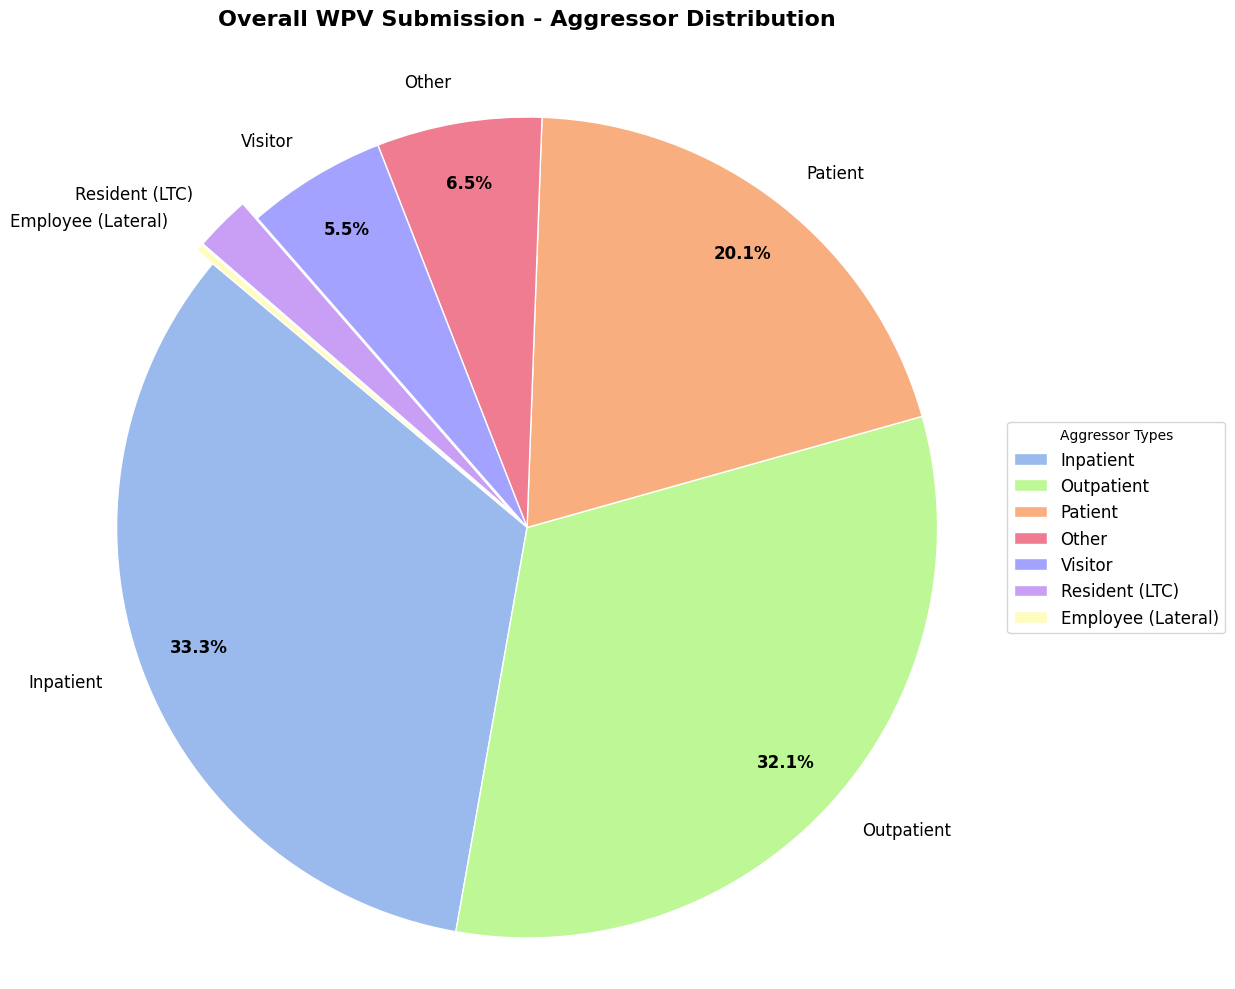

In [49]:
# Combine all aggressor data (excluding NA values) and count occurrences
aggressor_counts = all_dates['Aggressor'].value_counts()

plt.figure(figsize=(12, 10))

# Custom colors (optional)
colors = ['#9ab9ed','#bdf796','#f9ae7f','#ef7c91','#a3a3ff','#c89ff4','#fffcbf']

# Explode the smallest slices for better visibility
explode = [0.05 if (count/sum(aggressor_counts)*100) < 5 else 0 for count in aggressor_counts]

# Plot with improved parameters
wedges, texts, autotexts = plt.pie(
    aggressor_counts,
    explode=explode,
    labels=aggressor_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p >= 5 else '',  # Only show % for slices >5%
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    pctdistance=0.85
)

# Improve label appearance
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12)

# Add legend for small slices
plt.legend(
    wedges,
    aggressor_counts.index,
    title="Aggressor Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

# Add title with improved formatting
plt.title('Overall WPV Submission - Aggressor Distribution\n',
          fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio
plt.axis('equal')

# Add white circle in center to make it a donut chart (optional)
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

For the LTC, it comes from MHA dataset, which clears itself from potential overlapping.



In [53]:
# Check for null/na values in the 'Aggressor' field
for hosp, df in dfs.items():
    has_resident_ltc = (df['Aggressor'] == 'Resident (LTC)').any()
    print(f"{hosp} - Contains 'Resident (LTC)':", has_resident_ltc)

1 - Contains 'Resident (LTC)': True
2 - Contains 'Resident (LTC)': True
NLH - Contains 'Resident (LTC)': False
MHA - Contains 'Resident (LTC)': True


The 'Aggressor' column breaks down the group of people who was involved in these incidents. Here's a plain explaination:

1. **`'Patient'`**  
   - A patient receiving medical care in the facility (could be inpatient or outpatient).

2. **`'Inpatient'`**  
   - A patient admitted to the hospital (staying overnight or longer), as opposed to an outpatient.

3. **`'Outpatient'`**  
   - A patient receiving treatment (e.g., clinic visit, day surgery) but not admitted overnight.

4. **`'Resident (LTC)'`**  
   - A long-term care (LTC) resident, typically in a nursing home or rehabilitation facility.  

5. **`'Employee (Lateral)'`**  
   - A staff member (e.g., nurse, doctor, technician) who is aggressive toward another employee at the same level (not a supervisor-subordinate conflict, e.g., nurse vs. nurse).  

6. **`'Visitor'`**  
   - A family member, friend, or other non-staff individual visiting a patient.

7. **`'Other'`**  
   - Unspecified or miscellaneous aggressors.